1° Seção: Contexto

**Brazilian Portuguese Sentiment Analysis Datasets**

  Apesar dos recentes avanços da PNL, a língua portuguesa brasileira ainda possui recursos linguísticos limitados. Devido à escassez de conjuntos de dados de classificação de texto em português brasileiro e trabalhos comparando o desempenho de modelos de aprendizado de máquina em benchmarks com partições pré-definidas.

  O Buscapé é um grande corpus de análises de produtos portugueses rastreados em 2013 com mais de 80.000 amostras do Buscapé, um site de busca de produtos e preços.

  Ainda no contexto do dataset refere-se ao tratamento, como na etapa de pré-processamento onde a polaridade e classificação do conjunto são observados e adicionado um campo de usuários tokenizados e juntamente com tratamentos necessários. O repositório temporário selecionado foi o google Colab, pacotes para tratamento de palavras e importação de bibliotecas como Seaborn, Numpy, Spacy, Pandas e outros.

  Quanto a implementação do modelo e parametrização com base no uso do LSTM e Dense, após tratamentos nos textos como: substituição de letras com acentos, transformações para minúsculo, Lemarização das palavras para trazê-las aos seu radical para redução de mesmos significados e outros...

  O que faremos?
  Nossa proposta é de desenvolvimento de um modelo utilizando redes neurais para a classificação de sentimento, através de revisões binárias (positivo e negativo) dos comentários gerados referentes aos produtos encontrados no buscapé.
  
  Preparamos e transformamos os comentários em sinteses menores eliminando palavras que não refletem sentimento (positivo ou negativo), resumindo cada vez mais os textos.

  Nosso modelo obteve resultados como: (Acurácia 86,39%, precisão 85,58% e erro médio absoluto de 19,96%) onde ele foi capaz de classificar corretamente, 5 de 6 casos nos testes realizados e para confrontar este modelo aplicamos um segundo modelo para obtermos como base de comparação e desempenho (Acurácia 66,61%, precisão 75,00% e erro médio absoluto de 44,80%), este segundo modelo foi de redes neurais densa totalmente conectada uma camada oculta e com a mesma quantidade de neurônios da rede LSTM implementada anteriormente.


  Para a realização deste projeto seguimos as etapas abaixo e descrevemos suas funções.

Tarefas do projeto:
- Preparação e pré processamento;
- Implementação e parametrização do modelo;
- Avaliação das métricas;
- Construção do relatório.

# Preparação do ambiente e download do dataset

A celula abaixo monta o repositório temporário do Google Colab.

In [ ]:
from google.colab import drive
drive.mount('/content/drive');

Mounted at /content/drive


Download do pacote em português do SpaCy para tratamento de palavras

In [ ]:
!python -m spacy download 'pt_core_news_sm';

/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
2022-12-09 00:59:30.000868: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 13.0 MB 9.8 MB/s 
✔ Download and installation successful
You can now load the package via spacy.load('pt_core_news_sm')


Importe para a raiz do Colab (/content/) o arquivo kaggle.json que tera seu Token de acesso. Para gerar seu token:

1. Vá para sua conta, role até a seção API e clique em Expirar token de API para remover tokens anteriores
2. Clique em Criar novo token de API - Ele fará o download do arquivo kaggle.json em sua máquina.


In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

Instalação do pacote keras

In [ ]:
!pip install keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Importação das bibliotecas que o notebook necessita

In [ ]:
import kaggle # Utilizado para carregar o conjunto de dados diretamento do kaggle;
from zipfile import ZipFile # Utilizado para descompactacao dos arquivos ZIP
import pandas as pd # Biblioteca que fornece ferramentas para analise e manipulacao dos dados
import spacy #spaCy é uma biblioteca de código aberto para processamento de linguagem natural em Python. Possui NER, marcação POS, análise de dependência, vetores de palavras e outros;

import nltk # Pacote utilizado para processamento de linguagem natural
nltk.download('punkt') # Download do tokenizador de frases
# Download de palavras frequentemente ignoradas pelos tokenizadores (um, uma, de, etc)
nltk.download('stopwords')
from nltk.corpus import stopwords

import re #Este módulo fornece operações para correspondência de expressões regulares semelhantes às encontradas em Perl. O nome do módulo vem das iniciais do termo em inglês regular expressions, também frequentemente chamadas de regex.
from unicodedata import normalize #normalizar é o ato de transformar strings (textos no padrão unicode) para uma forma normal onde os caracteres sempre terão a mesma representação binária em todo o seu programa.

import warnings #As mensagens de aviso são normalmente emitidas em situações em que é útil alertar o usuário sobre alguma condição em um programa;
warnings.filterwarnings("ignore")

/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Importação, extração e atribuição do dataset na variavel df

In [ ]:
!kaggle datasets download -d fredericods/ptbr-sentiment-analysis-datasets
df = (ZipFile('/content/ptbr-sentiment-analysis-datasets.zip').
              extract('buscape.csv', path='/content/'))
df = pd.read_csv('/content/buscape.csv', sep=',')

100% 876M/877M [00:11<00:00, 34.7MB/s]
100% 877M/877M [00:11<00:00, 79.2MB/s]


# Avaliação do Dataset

In [ ]:
pd.set_option('display.max_colwidth',None)
df.head(5)

,original_index,review_text,review_text_processed,review_text_tokenized,polarity,rating,kfold_polarity,kfold_rating
0,4_55516,"Estou muito satisfeito, o visor é melhor do que eu imaginava, boas imagens, desing ultra fino. Pelo preço é um exelente aparelho.\n\nO que gostei: Desing exelente, display, custo beneficio.\n\nO que não gostei: Não tem como adicionar mais papeis de parede, bateria dura pouco.","estou muito satisfeito, o visor e melhor do que eu imaginava, boas imagens, desing ultra fino. pelo preco e um exelente aparelho.\n\no que gostei: desing exelente, display, custo beneficio.\n\no que nao gostei: nao tem como adicionar mais papeis de parede, bateria dura pouco.","['estou', 'muito', 'satisfeito', 'visor', 'melhor', 'do', 'que', 'eu', 'imaginava', 'boas', 'imagens', 'desing', 'ultra', 'fino', 'pelo', 'preco', 'um', 'exelente', 'aparelho', 'que', 'gostei', 'desing', 'exelente', 'display', 'custo', 'beneficio', 'que', 'nao', 'gostei', 'nao', 'tem', 'como', 'adicionar', 'mais', 'papeis', 'de', 'parede', 'bateria', 'dura', 'pouco']",1.0,4,1,1
1,minus_1_105339,"""muito boa\n\nO que gostei: preco\n\nO que não gostei: poderia ser 42","""muito boa\n\no que gostei: preco\n\no que nao gostei: poderia ser 42","['muito', 'boa', 'que', 'gostei', 'preco', 'que', 'nao', 'gostei', 'poderia', 'ser', '42']",1.0,5,1,1
2,23_382139,"Rápida, ótima qualidade de impressão e fácil de usar, principalmente no wi-fi.\n\nO que gostei: Produto exelente, rápida na impressão, imprime com qualidade de laser e ecônômica. Recomendo a todos\n\nO que não gostei: Nada que desabone","rapida, otima qualidade de impressao e facil de usar, principalmente no wi-fi.\n\no que gostei: produto exelente, rapida na impressao, imprime com qualidade de laser e economica. recomendo a todos\n\no que nao gostei: nada que desabone","['rapida', 'otima', 'qualidade', 'de', 'impressao', 'facil', 'de', 'usar', 'principalmente', 'no', 'wi', 'fi', 'que', 'gostei', 'produto', 'exelente', 'rapida', 'na', 'impressao', 'imprime', 'com', 'qualidade', 'de', 'laser', 'economica', 'recomendo', 'todos', 'que', 'nao', 'gostei', 'nada', 'que', 'desabone']",1.0,5,1,1
3,2_446456,Produto de ótima qualidade em todos os quesito!,produto de otima qualidade em todos os quesito!,"['produto', 'de', 'otima', 'qualidade', 'em', 'todos', 'os', 'quesito']",1.0,5,1,1
4,0_11324,Precisava comprar uma tv compatível com meu dvd. Esra foi a que tinha o melhor custo benefício. Estou satisfeita com a minha compra.\n\nO que gostei: preço mais baixo; produto de qualidade.\n\nO que não gostei: não tem.,precisava comprar uma tv compativel com meu dvd. esra foi a que tinha o melhor custo beneficio. estou satisfeita com a minha compra.\n\no que gostei: preco mais baixo; produto de qualidade.\n\no que nao gostei: nao tem.,"['precisava', 'comprar', 'uma', 'tv', 'compativel', 'com', 'meu', 'dvd', 'esra', 'foi', 'que', 'tinha', 'melhor', 'custo', 'beneficio', 'estou', 'satisfeita', 'com', 'minha', 'compra', 'que', 'gostei', 'preco', 'mais', 'baixo', 'produto', 'de', 'qualidade', 'que', 'nao', 'gostei', 'nao', 'tem']",1.0,5,1,1


Deste este dataset, iremos utilizar as colunas 'review_text' e 'rating'.

A coluna **rating** receberá os seguintes tratamento:
   
1. As avaliações 1, 2 e 3 serão substituídas por 'negativo'
2. As avaliações 4 e 5 serão substituídas por 'positivo'

A coluna **review_text** receberá os seguintes tratamento:

1. Avaliação dos dados faltantes e duplicados;
2. As letras serão padronizadas em minúsculo;
3. Caracteres especiais e quebras de linha serão removidos;
4. Serão removidos números dos textos;
5. Palavras que não agregam na construção e na compreensão do contexto serão removidas (stopwords);
6. As palavras serão trazidas aos seus radicais por técnica de "Lemmarization"






* Ajustes na coluna rating
* Excluindo registros duplicados e registros vazios na coluna review_text

In [ ]:
df_change1 = pd.DataFrame(df[['review_text','rating']].assign(rating = ['positivo' if (x>3) else 'negativo' for x in df['rating']]))
df_change1.drop_duplicates(subset=['review_text','rating'], keep='last', inplace=True)
df_change1.dropna(subset=['review_text'], inplace=True)

In [ ]:
df_change1.info() #Este método imprime informações sobre um DataFrame, incluindo o índice dtype e colunas, valores não nulos e uso de memória.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78754 entries, 0 to 84990
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   review_text  78754 non-null  object
 1   rating       78754 non-null  object
dtypes: object(2)
memory usage: 1.8+ MB


Verifica a quantidade de avaliações positivas e negativas.

In [ ]:
df_change1['rating'].value_counts()

positivo    60939
negativo    17815
Name: rating, dtype: int64

Devido ao desbalanceamento, o dataset sera reduzido de forma aleatória nas avaliações positivas em uma proporção de duas avaliações positivas para cada avaliação negativa. Ou seja, serão removidos cerca de 40% dos registros com avaliação 4 ou 5 de forma aleatória.
Fixaremos o Random State na função sample para que nao haja coleta aleatória a cada rodada do código e assim nao variar os resultados na fase de testes.

In [ ]:
perc_pos = (df_change1['rating'].value_counts()[1] * 2) / df_change1['rating'].value_counts()[0]
df_change2 = (pd.merge(df_change1.loc[df_change1['rating'] =='negativo'],
                                df_change1.loc[df_change1['rating'] =='positivo']
                               .sample(frac=perc_pos, random_state=42), how='outer')
             )
df_change2['rating'].value_counts()

positivo    35630
negativo    17815
Name: rating, dtype: int64

Aplica as seguintes limpezas nos textos:
* Substituição de letras com acentos por suas correspondentes ASCII
* Transformação das letras para minúsculo
* Lemarização das palavras para trazê-las ao seu radical, o que auxilia na diminuição da quantidade de variações de palavras com mesmo significado;
* Remoção de números e caracteres especiais;
* Remoção de quebras de linha e espaços duplos;
* Remoção das stopwords (palavras não relevantes para um processo de associação);

In [ ]:
def clean_text(dataframe):
  stop = stopwords.words('portuguese')
  lemma = spacy.load("pt_core_news_sm",disable = ['parser','ner'])
  df = (dataframe.astype('str')
                 .apply(lambda x: normalize('NFKD', x).encode('ASCII','ignore').decode('ASCII'))
                 .apply(lambda y: y.lower())
                 .apply(lambda z: re.sub('[^a-z\s]','',z))
                 .apply(lambda t: lemma(t))
                 .apply(lambda w: ' '.join([token.lemma_ for token in w]))
                 .apply(lambda i: " ".join(i.split()))
                 .apply(lambda k: nltk.word_tokenize(k))
                 .apply(lambda l: [item for item in l if item not in stop])
                 .apply(lambda m: ' '.join(m))

       )

  return df

df_change2['review_text_treated']=clean_text(df_change2['review_text'])

Fixamos o número de palavras do vocabulário com as 3000 de maior recorrência

In [ ]:
from keras.preprocessing.text import Tokenizer # O módulo fornece um scanner léxico para código-fonte Python, implementado em Python. O scanner neste módulo também retorna comentários como tokens.

tokenizador = Tokenizer(num_words=3000)
tokenizador.fit_on_texts(df_change2['review_text_treated'].values)
X = tokenizador.texts_to_sequences(df_change2['review_text_treated'].values)

No código abaixo fazemos com que cada amostra fique do mesmo tamanho, adicionando à cada lista zeros a esquerda, ou seja, a rede LSTM irá dar mais peso ao texto realmente escrito uma vez que dá maior peso aos valores mais recentes.

In [ ]:
from keras_preprocessing.sequence import pad_sequences # é usado para garantir que todas as sequências em uma lista tenham o mesmo comprimento. Por padrão, isso é feito preenchendo 0o início de cada sequência até que cada sequência tenha o mesmo comprimento que a sequência mais longa.

maximo_comprimento = max(len(i) for i in X)
print(maximo_comprimento)
X = pad_sequences(X)

463


Com a utilização da biblioteca "scikit-learn", faremos a divisão dos datasets de treino e teste, onde:
* Y: é a variável alvo, os valores são coletados e transformados em arrays a partir da coluna rating
* X: são as reviews em si, já pré-processadas conforme o código acima

In [ ]:
from sklearn.model_selection import train_test_split

Y = pd.get_dummies(df_change2['rating']).values # Aplicando one-hot-encoding na variável target
x_treino, x_teste, y_treino, y_teste = train_test_split(X,Y, test_size = 0.3)
print('Tamanho do treino: ', x_treino.shape, y_treino.shape)
print('Tamanho do teste: ', x_teste.shape, y_teste.shape)

Tamanho do treino:  (37411, 463) (37411, 2)
Tamanho do teste:  (16034, 463) (16034, 2)


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM
from keras.metrics import TrueNegatives, FalseNegatives, TruePositives, FalsePositives, Precision, Recall, AUC
import warnings
warnings.filterwarnings('ignore')

# Criando a rede neural:

modelo = Sequential()
modelo.add(Embedding(input_dim=3000, output_dim=200, input_length = X.shape[1]))
# criando os vetores word embedding. X.shape[1] é o número de palavras que cada amostra tem.
modelo.add(LSTM(150, dropout=0.3))
# criando a LSTM (150 neurônios na camada oculta)
modelo.add(Dense(2, activation='softmax'))
# definindo a saída com 2 classes
modelo.compile(loss='categorical_crossentropy', optimizer='adam',
               metrics=['mean_squared_error', 'mean_absolute_error', 'accuracy',
                        TrueNegatives(0.7, name='tn'), FalseNegatives(0.7, name='fn'), TruePositives(0.7, name='tp'), FalsePositives(0.7, name='fp'),
                        Precision(thresholds=[0.3, 0.7], name='precision'), Recall(thresholds=[0.3, 0.7], name='recall'), AUC(thresholds=[0.3, 0.7], name='auc')])




In [ ]:
history = modelo.fit(x_treino,y_treino, batch_size = 500, epochs = 10, verbose = 2)

Epoch 1/10
75/75 - 611s - loss: 0.5360 - mean_squared_error: 0.1794 - mean_absolute_error: 0.3630 - accuracy: 0.7306 - tn: 34392.0000 - fn: 21234.0000 - tp: 16177.0000 - fp: 3019.0000 - precision: 0.7305 - recall: 0.6759 - auc: 0.7615 - 611s/epoch - 8s/step
Epoch 2/10
75/75 - 583s - loss: 0.4323 - mean_squared_error: 0.1380 - mean_absolute_error: 0.2776 - accuracy: 0.8054 - tn: 33824.0000 - fn: 12865.0000 - tp: 24546.0000 - fp: 3587.0000 - precision: 0.7985 - recall: 0.7801 - auc: 0.8496 - 583s/epoch - 8s/step
Epoch 3/10
75/75 - 586s - loss: 0.4092 - mean_squared_error: 0.1291 - mean_absolute_error: 0.2604 - accuracy: 0.8203 - tn: 33917.0000 - fn: 11726.0000 - tp: 25685.0000 - fp: 3494.0000 - precision: 0.8117 - recall: 0.7966 - auc: 0.8618 - 586s/epoch - 8s/step
Epoch 4/10
75/75 - 607s - loss: 0.3939 - mean_squared_error: 0.1236 - mean_absolute_error: 0.2495 - accuracy: 0.8285 - tn: 34116.0000 - fn: 11143.0000 - tp: 26268.0000 - fp: 3295.0000 - precision: 0.8212 - recall: 0.8070 - auc

In [ ]:
# Realizando o salvamento do modelo 1 (Rede Neural com LSTM)
import pickle

!mkdir -p saved_model
modelo.save('/content/drive/MyDrive/Models/modelo1')

# Modelo de Rede neural densa totalmente conectada

In [ ]:
modelo2 = Sequential()
modelo2.add(Dense(3000, activation='relu', input_shape = (463,)))
# criando os vetores word embedding. X.shape[1] é o número de palavras que cada amostra tem.
modelo2.add(Dense(150, activation='relu'))
modelo2.add(Dense(2,activation='softmax'))
  # definindo a saída com 2 classes
modelo2.compile(loss='categorical_crossentropy', optimizer='adam',
               metrics=['mean_squared_error', 'mean_absolute_error', 'accuracy',
                        TrueNegatives(0.7, name='tn'), FalseNegatives(0.7, name='fn'), TruePositives(0.7, name='tp'), FalsePositives(0.7, name='fp'),
                        Precision(thresholds=[0.3, 0.7], name='precision'), Recall(thresholds=[0.3, 0.7], name='recall'), AUC(thresholds=[0.3, 0.7], name='auc')])


In [ ]:
history2 = modelo2.fit(x_treino,y_treino, batch_size = 500, epochs = 10, verbose = 2)

Epoch 1/10
75/75 - 10s - loss: 9.4604 - mean_squared_error: 0.2673 - mean_absolute_error: 0.4919 - accuracy: 0.6496 - tn: 35562.0000 - fn: 35165.0000 - tp: 2246.0000 - fp: 1849.0000 - precision: 0.5256 - recall: 0.5053 - auc: 0.5100 - 10s/epoch - 138ms/step
Epoch 2/10
75/75 - 8s - loss: 0.6714 - mean_squared_error: 0.2392 - mean_absolute_error: 0.4877 - accuracy: 0.6661 - tn: 37411.0000 - fn: 37411.0000 - tp: 0.0000e+00 - fp: 0.0000e+00 - precision: 0.2500 - recall: 0.5000 - auc: 0.5000 - 8s/epoch - 104ms/step
Epoch 3/10
75/75 - 6s - loss: 0.6588 - mean_squared_error: 0.2329 - mean_absolute_error: 0.4787 - accuracy: 0.6661 - tn: 37411.0000 - fn: 37411.0000 - tp: 0.0000e+00 - fp: 0.0000e+00 - precision: 0.2500 - recall: 0.5000 - auc: 0.5000 - 6s/epoch - 82ms/step
Epoch 4/10
75/75 - 7s - loss: 0.6500 - mean_squared_error: 0.2286 - mean_absolute_error: 0.4709 - accuracy: 0.6661 - tn: 37411.0000 - fn: 37411.0000 - tp: 0.0000e+00 - fp: 0.0000e+00 - precision: 0.2500 - recall: 0.5000 - auc: 

In [ ]:
# Realizando o salvamento do modelo 2 (Rede Neural Densa totalmente conectada)

!mkdir -p saved_model
modelo2.save('/content/drive/MyDrive/Models/modelo2')

# Avaliação da performance dos modelos

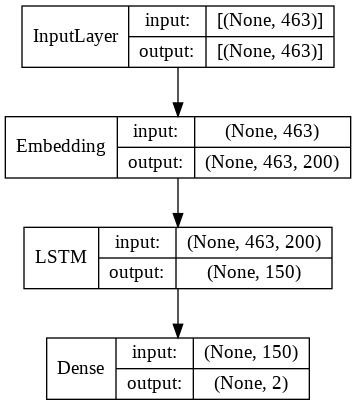

In [ ]:
from keras.utils import plot_model #Converte um modelo Keras em formato de ponto e salva em um arquivo.

# Exibindo informações do modelo 1 (Sequências, Camadas e Formatos Input-Output)
plot_model(modelo, to_file='modelo.png', show_shapes=True, show_layer_names=False)

# InputLayer: Camada de entrada dos dados ao modelo, com formato 463 (texto com padding)
# Embedding: Camada com formato de entrada 463 e formato de saída (463, 200)
# LSTM: Camada com formato de entrada (463, 200) e formato de saída 150
# Dense: Camada com formato de entrada 150 e formato de saída 2 (0 = negativo ou 1 = positivo)

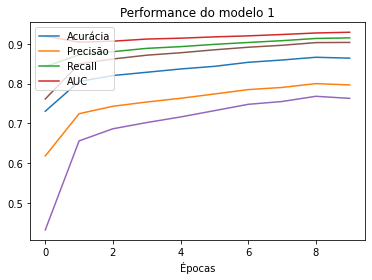

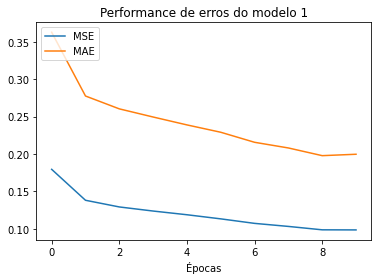


Médias:

Acurácia: 83.08%
Precisão: 82.32%
Recall: 80.66%
AUC: 87.01%


In [ ]:
from matplotlib import pyplot # método bar () para fazer gráficos de barras ou linhas;
import numpy as np

# Plotando gráfico de linhas, exibindo valores de performance do modelo ao decorrer das épocas

pyplot.title('Performance do modelo 1')
pyplot.xlabel('Épocas')
pyplot.plot(history.history['accuracy']) # Acurácia
pyplot.plot(history.history['precision']) # Precisão
pyplot.plot(history.history['recall']) # Recall
pyplot.plot(history.history['auc']) # AUC
pyplot.legend(['Acurácia', 'Precisão', 'Recall', 'AUC'], loc="upper left")
pyplot.show()

pyplot.title('Performance de erros do modelo 1')
pyplot.xlabel('Épocas')
pyplot.plot(history.history['mean_squared_error']) # Erro Quadrático Médio
pyplot.plot(history.history['mean_absolute_error']) # Erro Absoluto Médio
pyplot.legend(['MSE', 'MAE'], loc="upper left")
pyplot.show()

print('\nMédias:\n')
print(f"Acurácia: {round(np.array(history.history['accuracy']).mean() * 100, 2)}%")
print(f"Precisão: {round(np.array(history.history['precision']).mean() * 100, 2)}%")
print(f"Recall: {round(np.array(history.history['recall']).mean() * 100, 2)}%")
print(f"AUC: {round(np.array(history.history['auc']).mean() * 100, 2)}%")

Exibindo heatmap com Verdadeiros Positivos, Falsos Positivos, Verdadeiros Negativos e Falsos Negativos ao decorrer das épocas

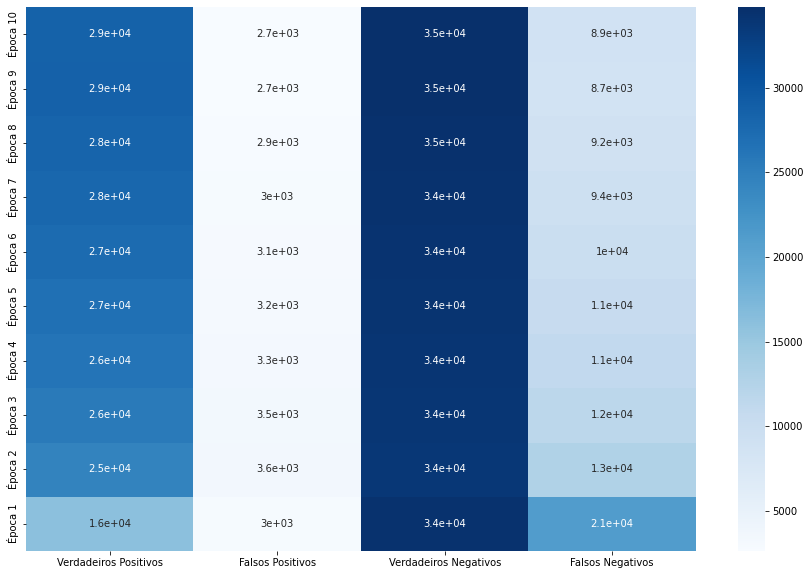

In [ ]:
import seaborn as sns # usada na criação de gráficos estatísticos, sendo capaz de se integrar com estrutura de dados da biblioteca pandas.

# Atribuindo valores do histórico do modelo 1 em um DataFrame
pos_neg = pd.DataFrame()
pos_neg['Verdadeiros Positivos'] = history.history['tp']
pos_neg['Falsos Positivos'] = history.history['fp']
pos_neg['Verdadeiros Negativos'] = history.history['tn']
pos_neg['Falsos Negativos'] = history.history['fn']

fig, ax = pyplot.subplots(figsize=(15, 10))
# Atribuindo DataFrame ao heatmap e formatando as labels do eixo y
sns.heatmap(pos_neg, annot=True, yticklabels=[f'Época {e + 1}' for e in history.epoch], cmap='Blues')
ax.invert_yaxis() # Invertendo o eixo y, para que as épocas sejam exibidas de forma decrescente
pyplot.show()

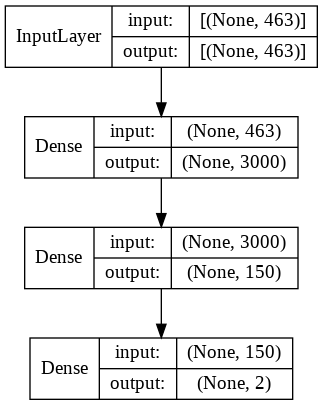

In [ ]:
from keras.utils import plot_model
# Exibindo informações do modelo 2 (Sequências, Camadas e Formatos Input-Output)
plot_model(modelo2, to_file='modelo2.png', show_shapes=True, show_layer_names=False)

# InputLayer: Camada de entrada dos dados ao modelo, com formato 463 (texto com padding)
# Dense: Camada com formato de entrada 463 e formato de saída 3000
# Dense: Camada com formato de entrada 3000 e formato de saída 150
# Dense: Camada com formato de entrada 150 e formato de saída 2 (0 = negativo ou 1 = positivo)

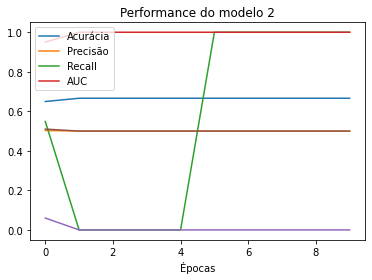

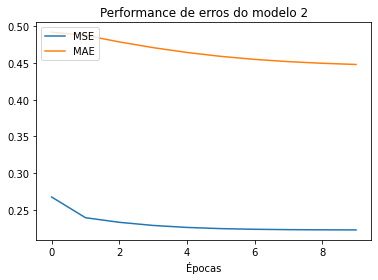


Médias:

Acurácia: 66.44%
Precisão: 52.76%
Recall: 50.05%
AUC: 50.1%


In [ ]:
# Plotando gráfico de linhas, exibindo valores de performance do modelo ao decorrer das épocas
pyplot.title('Performance do modelo 2')
pyplot.xlabel('Épocas')
pyplot.plot(history2.history['accuracy']) # Acurácia
pyplot.plot(history2.history['precision']) # Precisão
pyplot.plot(history2.history['recall']) # Recall
pyplot.plot(history2.history['auc']) # AUC
pyplot.legend(['Acurácia', 'Precisão', 'Recall', 'AUC'], loc="upper left")
pyplot.show()

pyplot.title('Performance de erros do modelo 2')
pyplot.xlabel('Épocas')
pyplot.plot(history2.history['mean_squared_error']) # Erro Quadrático Médio
pyplot.plot(history2.history['mean_absolute_error']) # Erro Absoluto Médio
pyplot.legend(['MSE', 'MAE'], loc="upper left")
pyplot.show()

print('\nMédias:\n')
print(f"Acurácia: {round(np.array(history2.history['accuracy']).mean() * 100, 2)}%")
print(f"Precisão: {round(np.array(history2.history['precision']).mean() * 100, 2)}%")
print(f"Recall: {round(np.array(history2.history['recall']).mean() * 100, 2)}%")
print(f"AUC: {round(np.array(history2.history['auc']).mean() * 100, 2)}%")

Exibindo heatmap com Verdadeiros Positivos, Falsos Positivos, Verdadeiros Negativos e Falsos Negativos ao decorrer das épocas

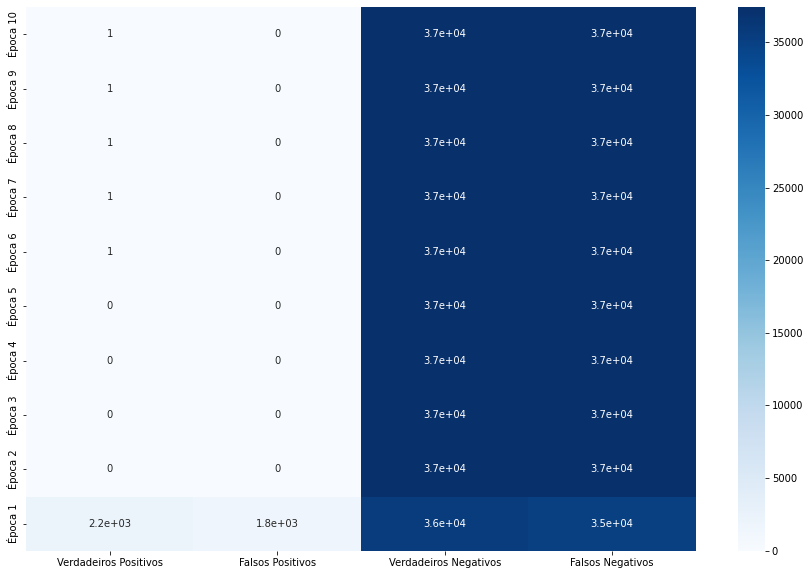

In [ ]:
# Atribuindo valores do histórico do modelo 2 em um DataFrame
pos_neg_2 = pd.DataFrame()
pos_neg_2['Verdadeiros Positivos'] = history2.history['tp']
pos_neg_2['Falsos Positivos'] = history2.history['fp']
pos_neg_2['Verdadeiros Negativos'] = history2.history['tn']
pos_neg_2['Falsos Negativos'] = history2.history['fn']

fig, ax = pyplot.subplots(figsize=(15, 10))
# Atribuindo DataFrame ao heatmap e formatando as labels do eixo y
sns.heatmap(pos_neg_2, annot=True, yticklabels=[f'Época {e + 1}' for e in history2.epoch], cmap='Blues')
ax.invert_yaxis() # Invertendo o eixo y, para que as épocas sejam exibidas de forma decrescente
pyplot.show()

# Realização de testes com os modelos treinados

Executamos nossa própria review com os modelos treinados, com o objetivo de testar a classificação dos modelos

In [ ]:
import numpy as np

# Escrevendo algumas revisões para testar no modelo treinado
review1 = ["Gostei muito do relógio. Super fácil e prático, além de ser bem barato. Parabéns.",
           "Achei o relógio horrível. Não tem muitas funcionalidades e a bateria acaba muito rápido. Basicamente dinheiro jogado no lixo",
           "Um péssimo negócio.",
           'Uma excelente compra!',
           'É bom, mas nada demais.',
           'Não muito bom, o outro era melhor']
for i in review1:
  df_teste = pd.DataFrame()
  df_teste['review'] = [i]
  df_teste['review_treated'] = clean_text(df_teste['review'])

  x_revisao = tokenizador.texts_to_sequences(df_teste['review_treated'].values)
  x_revisao = pad_sequences(x_revisao, maxlen=463)

  print('------------------------------------------------')
  print(f'Review: {i}')
  print('------------------------------------------------\n')

  # Executar a review com o modelo treinado e exibir os resultados
  modelos = [modelo, modelo2]

  for m in modelos:
    print(f'MODELO {modelos.index(m) + 1}\n')

    pred_revisao = m.predict(x_revisao, batch_size=1, verbose = 0)[0]

    if(np.argmax(pred_revisao) == 0):
      pred_proba_pos = "%.2f%%" % (pred_revisao[1]*100)
      pred_proba_neg = "%.2f%%" % (pred_revisao[0]*100)
      print("AVALIAÇÃO NEGATIVA!\nSentimento positivo com probabilidade de",
            pred_proba_pos,'\nSentimento negativo com probabilidade de:', pred_proba_neg,'\n')

    elif (np.argmax(pred_revisao) == 1):
      pred_proba_pos = "%.2f%%" % (pred_revisao[1]*100)
      pred_proba_neg = "%.2f%%" % (pred_revisao[0]*100)
      print("AVALIAÇÃO POSITIVA!\nSentimento positivo com probabilidade de:",
            pred_proba_pos,"\nSentimento negativo com probabilidade de:", pred_proba_neg,'\n')

------------------------------------------------
Review: Gostei muito do relógio. Super fácil e prático, além de ser bem barato. Parabéns.
------------------------------------------------

MODELO 1

AVALIAÇÃO POSITIVA!
Sentimento positivo com probabilidade de: 99.94% 
Sentimento negativo com probabilidade de: 0.06% 

MODELO 2

AVALIAÇÃO POSITIVA!
Sentimento positivo com probabilidade de: 65.86% 
Sentimento negativo com probabilidade de: 34.14% 

------------------------------------------------
Review: Achei o relógio horrível. Não tem muitas funcionalidades e a bateria acaba muito rápido. Basicamente dinheiro jogado no lixo
------------------------------------------------

MODELO 1

AVALIAÇÃO NEGATIVA!
Sentimento positivo com probabilidade de 0.35% 
Sentimento negativo com probabilidade de: 99.65% 

MODELO 2

AVALIAÇÃO POSITIVA!
Sentimento positivo com probabilidade de: 65.86% 
Sentimento negativo com probabilidade de: 34.14% 

------------------------------------------------
Review: U

**Resultados obtidos:**
--------------------------------------
Quando verificamos os resultados obtidos por modelo, o primeiro modelo, ou Modelo 1, obteve uma maior precisão para encontrar o verdadeiro sentido da frase, sendo que a única frase que recebeu uma avaliação incorreta, possuia uma séria de palavras com viés positivo, o que de certa forma confunde o modelo. Quanto ao Modelo 2, ele acabou avaliando de forma similar todas as frases como possivelmente positivas, o que nos leva a considerar uma possível readequação e reavaliação do modelo no futuro.
<p>Abaixo são encontrados os resultados obtidos em cada frase pelos modelos:

---------------------------------------
<p>Frase 1 : Positiva. 🔼
<p>Gostei muito do relógio. Super fácil e prático, além de ser bem barato. Parabéns.

*   Modelo 1: 99.94% Positiva ✅
*   Modelo 2: 65.86% Positiva ✅
---------------------------------------
<p>Frase 2 : Negativa. 🔻
<p>Achei o relógio horrível. Não tem muitas funcionalidades e a bateria acaba muito rápido. Basicamente dinheiro jogado no lixo.

*   Modelo 1: 99.65% Negativa ✅
*   Modelo 2: 34.14% Negativa ❌
---------------------------------------
<p>Frase 3 : Negativa. 🔻
<p>Um péssimo negócio.

*   Modelo 1: 76.93% Negativa ✅
*   Modelo 2: 34.14% Negativa ❌

---------------------------------------
<p>Frase 4 : Positiva. 🔼
<p>Uma excelente compra!

*   Modelo 1: 97.87% Positiva ✅
*   Modelo 2: 65.86% Positiva ✅
---------------------------------------
<p>Frase 5 : Positiva. 🔼
<p>É bom, mas nada demais.

*   Modelo 1: 87.13% Positiva ✅
*   Modelo 2: 65.86% Positiva ✅
---------------------------------------
<p>Frase 6 : Negativa. 🔻
<p>Não muito bom, o outro era melhor.

*   Modelo 1: 12.66% Negativa ❌
*   Modelo 2: 34.14% Negativa ❌
---------------------------------------

Ao implementarmos as métricas de avaliação do modelo 2, encontramos algumas dificuldades como:

* Os componentes da matriz de confusão se somados após o término do treino resultam no dobro de dados que temos e não conseguimos encontrar a solução para este problema na literatura.
* Além disso, os resultados de Precisão e AUC estavam resultando no mesmo valor.
* O modelo 2 como base de comparação não parece minimamente adequado para o exercício proposto.


**Participantes: Grupo 11**

- Guilherme Rafael Zaltran;
- Gilmar Ferrari Filho;
- Rafael de Oliveira Consonni;
- Augusto de Freitas Kelsch;
- Bruna Luzia Santos Wehrmann;